In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

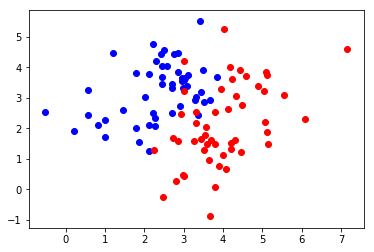

In [2]:
# generate random data
N1, N2 = 50, 50
mean1, cov1 = np.array([2,3]), np.matrix([[1., 0.5],[0.5, 1.]])
mean2, cov2 = np.array([4,2]), np.matrix([[1., 0.5],[0.5, 1.]])
cluster_1_data = np.random.multivariate_normal(mean1, cov2, N1)
cluster_2_data = np.random.multivariate_normal(mean2, cov2, N2)

X = np.r_[cluster_1_data, cluster_2_data]
y = np.r_[np.zeros((len(cluster_1_data),1)), np.ones((len(cluster_2_data),1))].flatten()

plt.scatter(cluster_1_data[:,0], cluster_1_data[:,1], facecolors='b')
plt.scatter(cluster_2_data[:,0], cluster_2_data[:,1], facecolors='r')

In [3]:
# Implement Fishers linear discriminant
class FishersTwoClassLinearDiscriminantClassifier(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        K = X.shape[1]
        X0, X1 = X[y==0,:], X[y==1,:]
        
        m0 = X0.mean(axis=0).reshape((1,K))
        m1 = X1.mean(axis=0).reshape((1,K))
        
        within_covariance = np.zeros((K,K))
        for i in range(X0.shape[0]):
            x0 = X0[i,:].reshape((1,K))
            within_covariance += np.dot(np.transpose(x0 - m0), x0 - m0)
        for i in range(X1.shape[0]):
            x1 = X1[i,:].reshape((1,K))
            within_covariance += np.dot(np.transpose(x1 - m1), x1 - m1)
        
        self.w = np.dot(np.linalg.inv(within_covariance), np.transpose(m1 - m0))
        self.w = self.w / np.linalg.norm(self.w)
        self.threshold = (np.dot(m0, self.w) + np.dot(m1, self.w)) / 2 # how to choose threshold?
        return self
    
    def predict(self, X):
        return np.dot(X, self.w) >= self.threshold

8.00% error rate


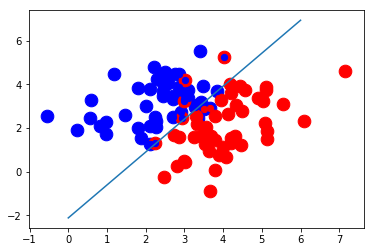

In [4]:
model = FishersTwoClassLinearDiscriminantClassifier().train(X, y)

y_pred = model.predict(X).flatten()
# actual in outer circle
plt.scatter(cluster_1_data[:,0], cluster_1_data[:,1], s=160, facecolors='blue')
plt.scatter(cluster_2_data[:,0], cluster_2_data[:,1], s=160, facecolors='red')
# predictions in inner circles
plt.scatter(X[y_pred==0,0], X[y_pred==0,1], s=40, facecolors='blue')
plt.scatter(X[y_pred==1,0], X[y_pred==1,1], s=40, facecolors='red')

# plot discriminant line
xs = np.linspace(0,6,100)
plt.plot(xs, (model.threshold/model.w[1] - model.w[0]*xs/model.w[1]).flatten())

print('{:.2f}% error rate'.format(100 * np.not_equal(y,y_pred).sum()/(X.shape[0])))